In [4]:
import numpy as np
import matplotlib.pyplot as plt


def gradient_descent(start, gradient, learn_rate, max_iter, tol=0.01):
  steps = [start] # history tracking
  x = start

  for _ in range(max_iter):
    diff = learn_rate*gradient(x)
    if np.abs(diff)<tol:
      break    
    x = x - diff
    steps.append(x) # history tracing

  return steps, x

In [5]:
def func1(x):
  return x**2-4*x+1

def gradient_func1(x):
  return 2*x - 4

In [6]:
history, result = gradient_descent(9, gradient_func1, 0.1, 100)

In [12]:
# Visualising
def graph_GD(history, max_iter, result):

  # Create x and y data to plot the eqn
  x = np.arange(-7, 11, 0.2) 
  y = func1(x)
  
  # Create respective y position for x values in history
  y_pos = [func1(x) for x in history]

  # Ploting begins
  plt.plot(x, y, 'royalblue')
  plt.plot(history, y_pos, 'ro--', markeredgecolor = 'm', markerfacecolor = 'y', markersize = 5)
  if len(history)-1 == max_iter:
    plt.title(f"Couldn't converge at learning rate of {lr}\nAfter {len(history)-1} interations, x = {round(result,3)} (3sf)", y = -0.15, color = 'green')
  else:
    plt.title(f"Took {len(history)-1} iterations to converge\nat a learning rate of {lr}", y = -0.15, color = 'green')
  plt.axis('off')

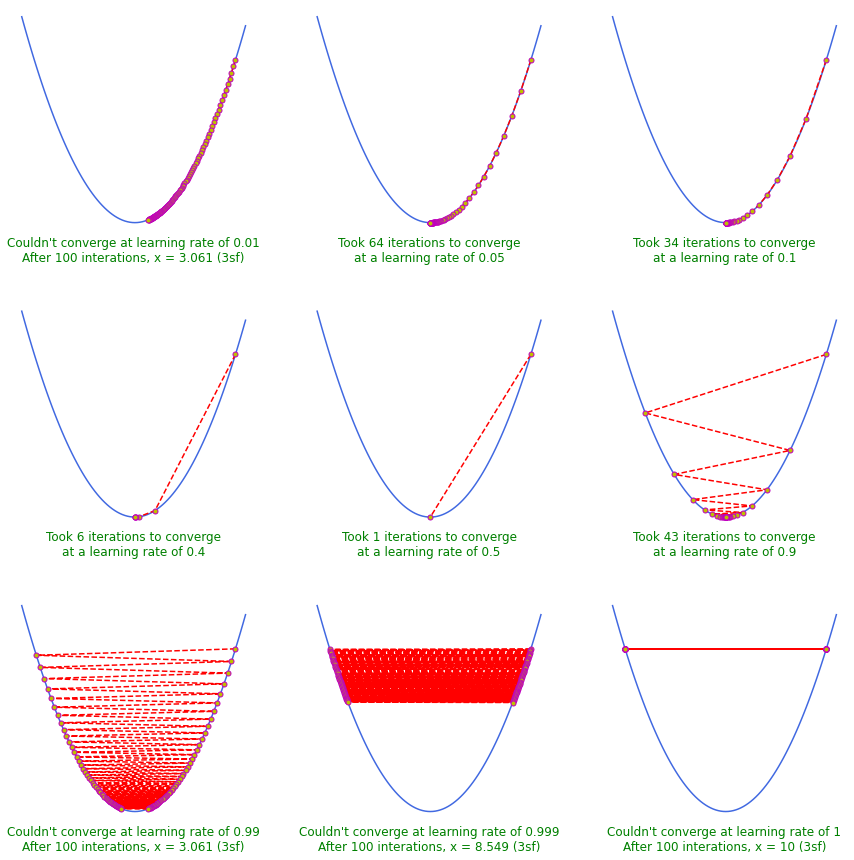

In [13]:
# Hyperparameters
start = 10
max_iter = 100
alpha = [0.01, 0.05, 0.1, 0.4, 0.5, 0.9, 0.99, 0.999, 1]
tol = 1e-3

# Subplots to check the effect of learning rate during 100 iterations
plt.figure(figsize = (15,15))  
for idx, lr in enumerate(alpha):
  history, result = gradient_descent(start, gradient_func1, lr, max_iter, tol)
  plt.subplot(3, 3, idx+1)
  graph_GD(history, max_iter, result)
plt.subplots_adjust(hspace = 0.3)
plt.show()